In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [64]:
save_image_path = "/Users/juanmarin/IronHack/pipeline-proj/out"

In [2]:
sns.set(rc={'figure.figsize':(10,7)})

In [3]:
df = pd.read_csv (r'/Users/juanmarin/IronHack/pipeline-proj/data/ordered.csv')

In [4]:
df.head()

,name,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,salary,return
0,Jaylen Adams,PG,22,ATL,34,428,7.6,0.474,0.673,0.082,...,-0.1,0.2,0.1,0.011,-3.8,-0.5,-4.3,-0.2,236854,3.506333
1,Steven Adams,C,25,OKC,80,2669,18.5,0.591,0.002,0.361,...,5.1,4.0,9.1,0.163,0.7,0.4,1.1,2.1,24157304,1.884123
2,Bam Adebayo,C,21,MIA,82,1913,17.9,0.623,0.031,0.465,...,3.4,3.4,6.8,0.171,-0.4,2.2,1.8,1.8,2955840,2.782172
3,LaMarcus Aldridge,C,33,SAS,81,2687,22.9,0.576,0.032,0.312,...,6.4,2.9,9.3,0.167,2.4,-0.6,1.8,2.6,22347015,2.010616
4,Grayson Allen,SG,23,UTA,38,416,7.5,0.516,0.556,0.337,...,-0.4,0.4,0.0,0.002,-4.2,-2.1,-6.3,-0.5,2076960,2.557633


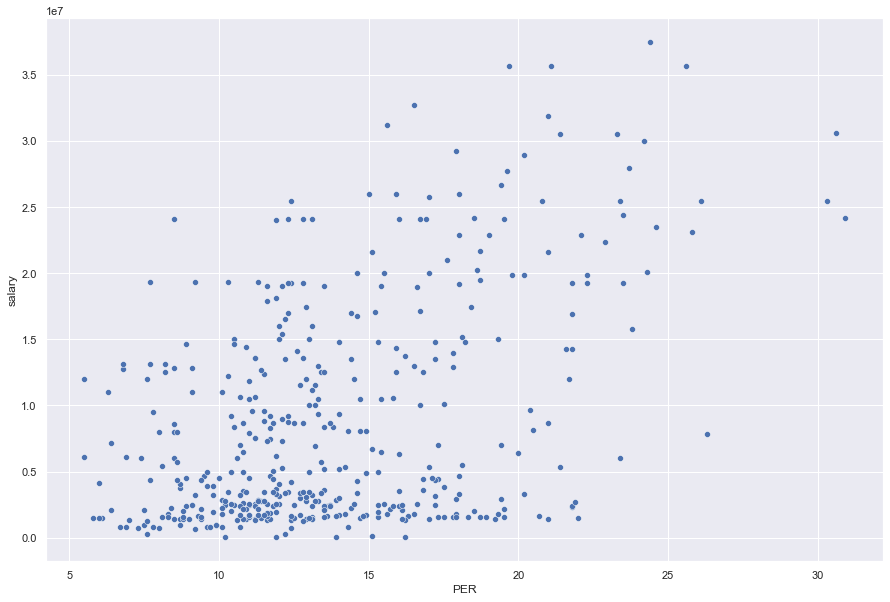

In [75]:
#Plot to show that there exists correlation between salary and per
sns.set(rc={'figure.figsize':(15,10)})
fig = sns.scatterplot(data = df, x = "PER", y = "salary")
fig.figure.savefig('per_vs_salary.png')

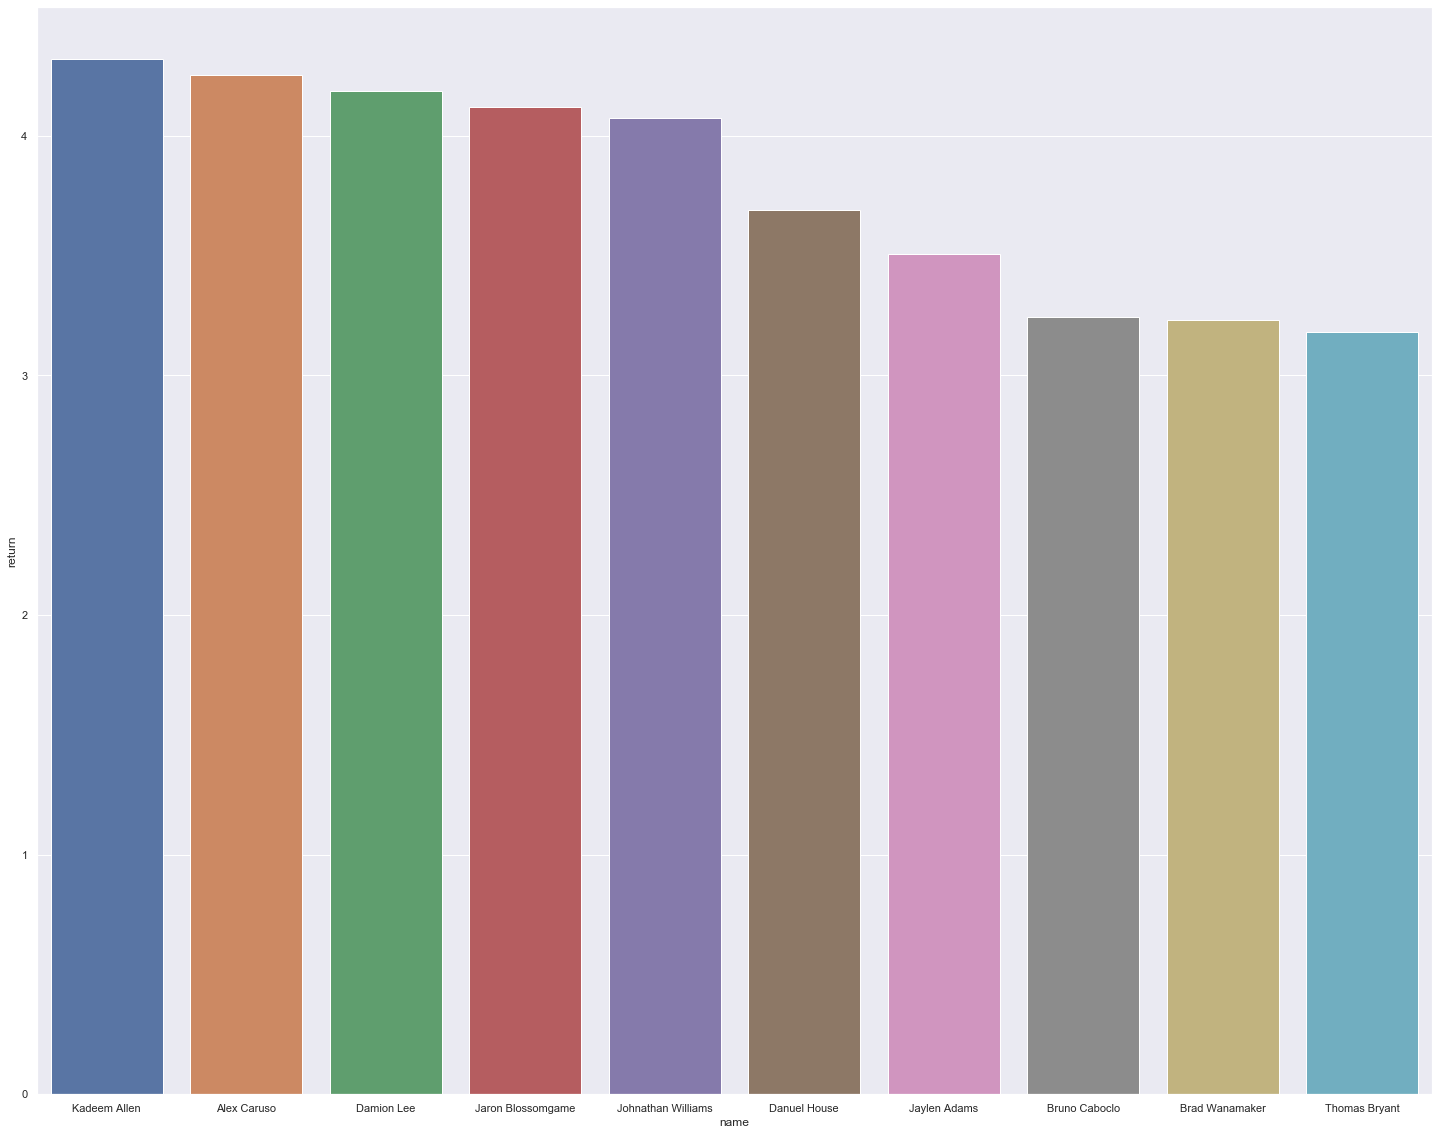

In [76]:
#most worth players
sns.set(rc={'figure.figsize':(25,20)})
fig = sns.barplot(data = df.sort_values(by='return', ascending=False)[:10], x = "name", y = "return")
fig.figure.savefig('best_contracts.png')

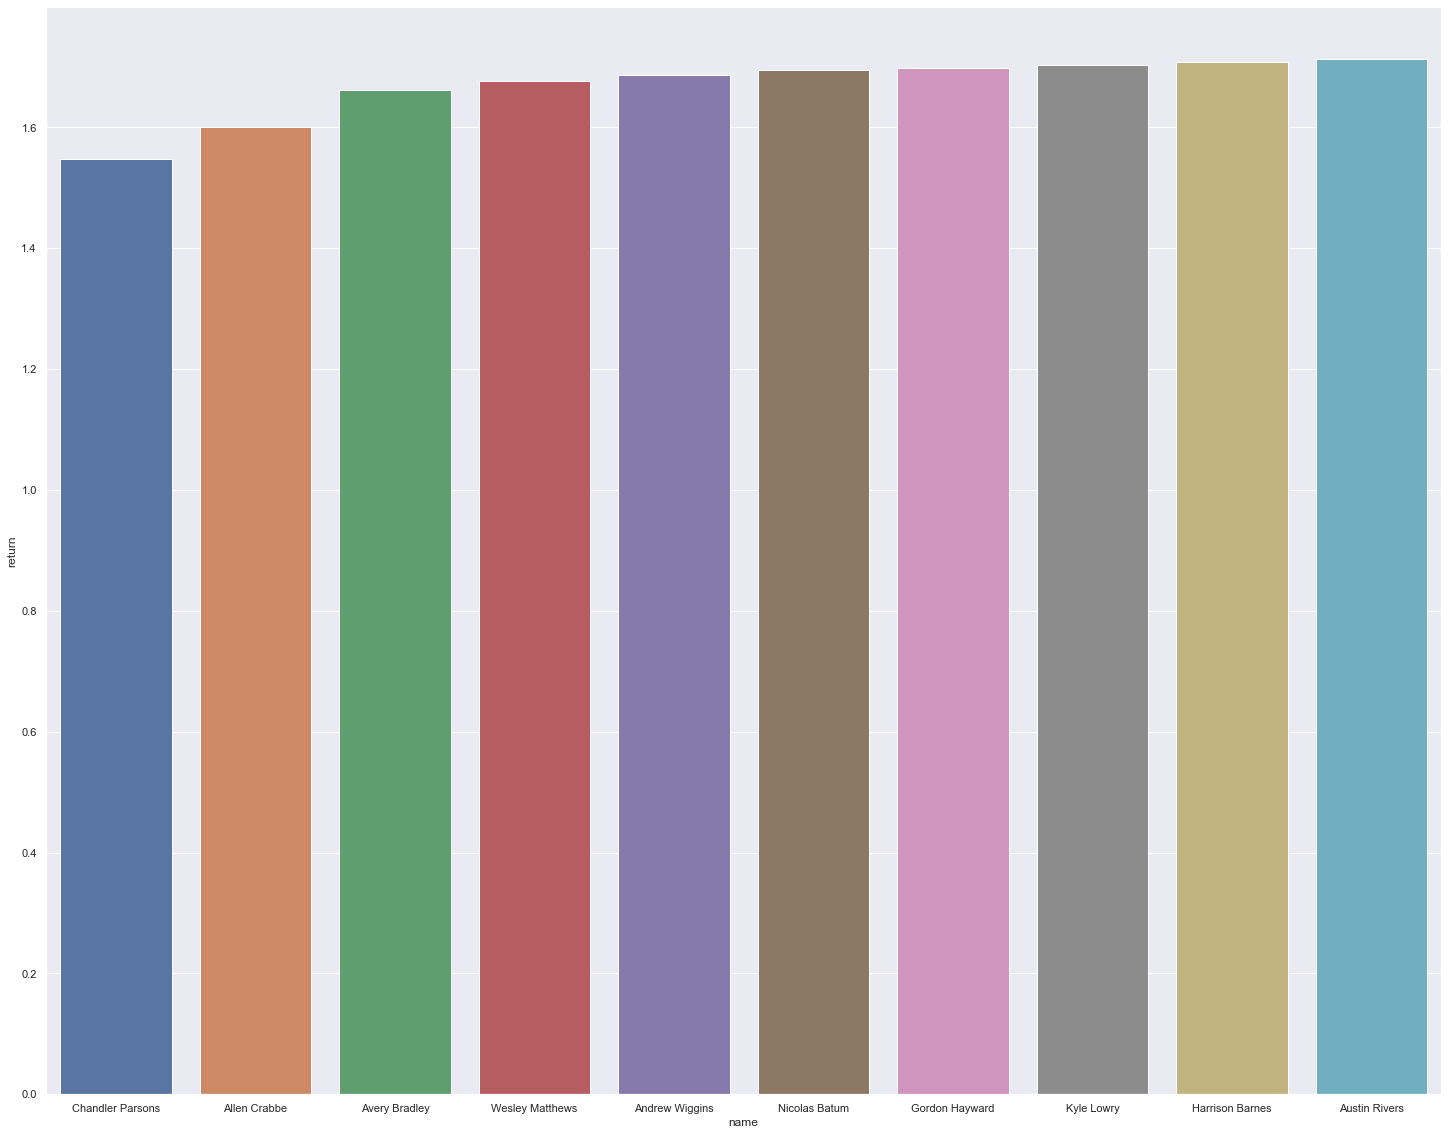

In [77]:
#least worth players
sns.set(rc={'figure.figsize':(25,20)})
fig = sns.barplot(data = df.sort_values(by='return', ascending=True)[:10], x = "name", y = "return")
fig.figure.savefig('worst_contracts.png')

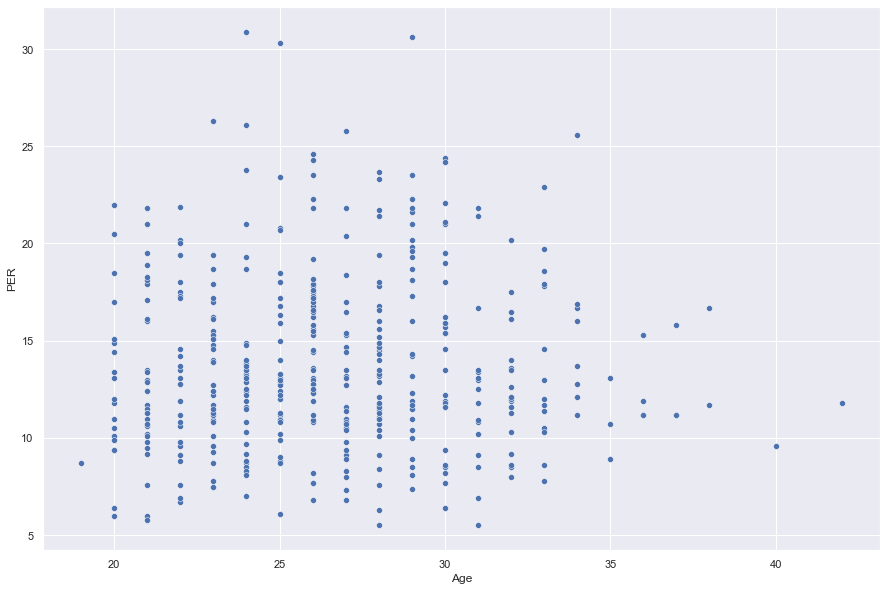

In [85]:
#Correlation between age and return
sns.set(rc={'figure.figsize':(15,10)})
fig = sns.scatterplot(data = df, x = "Age", y = "PER" )
fig.figure.savefig('age_vs_return.png')

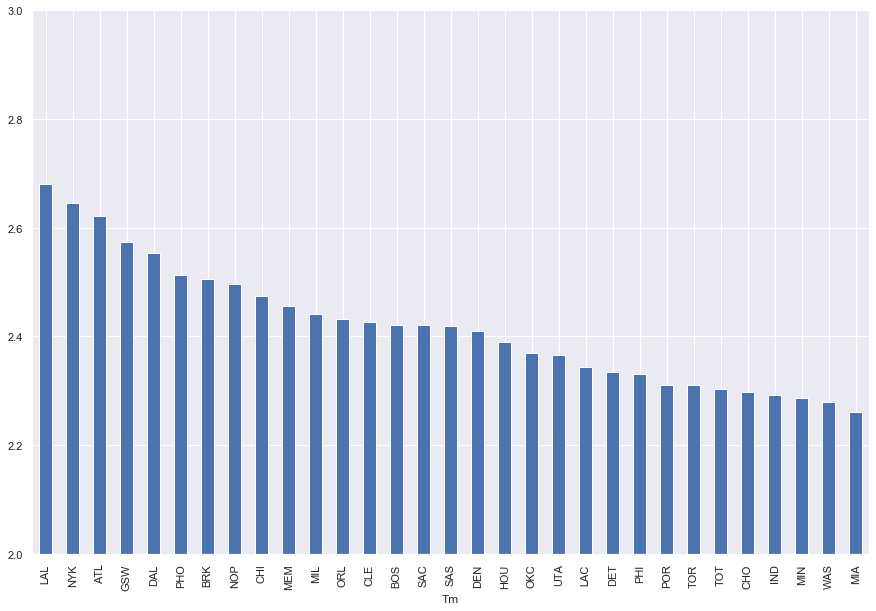

In [83]:
#Best/worst teams with their money

grouped = df.groupby('Tm')['return'].mean()

#print(grouped.sort_values)
fig = grouped.sort_values(ascending = False).plot.bar()
plt.ylim(2,3)
fig.figure.savefig('team_averages.png')

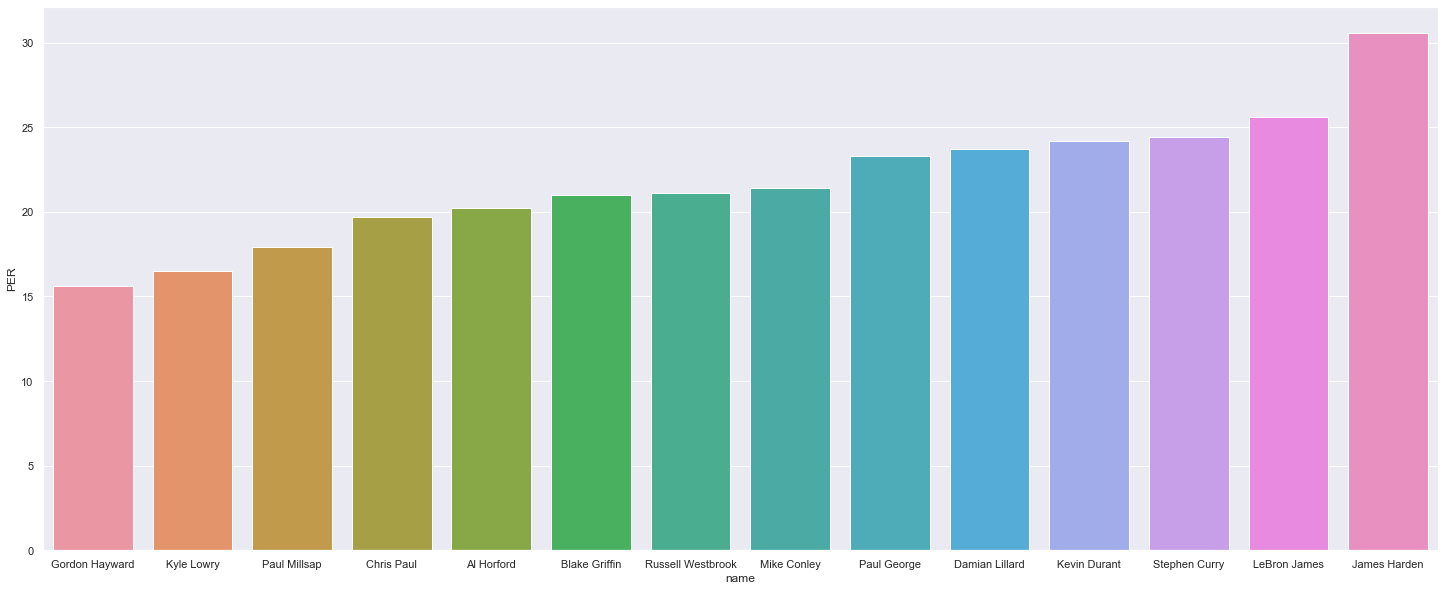

In [84]:
#best/worse max contracts
sns.set(rc={'figure.figsize':(25,10)})
top_10_pct_cont = df.salary.quantile(0.97)
max_players = df[(df['salary'] > top_10_pct_cont)]
fig = sns.barplot(data = max_players, y = "PER", x = "name", order=max_players.sort_values('PER').name)
fig.figure.savefig('rating_top_players.png')